# Work by: Leopoldo Rojo Romero
Student ID: 2023355

Higher Diploma in Science in Data Analytics for Business

Machine Learning for Business

Dr. Muhammad Iqbal

CCT College

Dublin, Ireland

*NOTE: If you are using the most recent version of Jupyter Notebook (7.0.8), you can navigate this notebook easily using the tabe of contents (Crtl+Shift+K).*

In [1]:
# if needed
!pip install --upgrade pandas
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fcmeans import FCM
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
import warnings
import missingno as msno
from sklearn.preprocessing import normalize

#warnings.filterwarnings('ignore)
%matplotlib inline

## Introduction

## Clustering

### Load our dataset and explore it by performing an Exploratory Data Analysis (EDA)

By performing an EDA we will understand our dataset, from its shape to its data.

#### Clustering Dataset 

In [3]:
clu = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

#### Dataset information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Obesity levels:**
Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

In [4]:
clu.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
clu.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Null Values

Before searching for null values, we will replace infinite values to NaN values, this will help us see these values as NaN values in the following '.isnull()' operation, in case that we have them.

In [7]:
clu.replace([np.inf, -np.inf], np.nan, inplace=True)

Percentage of null values in our dataset in each feature.

In [8]:
clu.isnull().mean()*100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

Lets use the missingno library to visualise the above information of missing values.

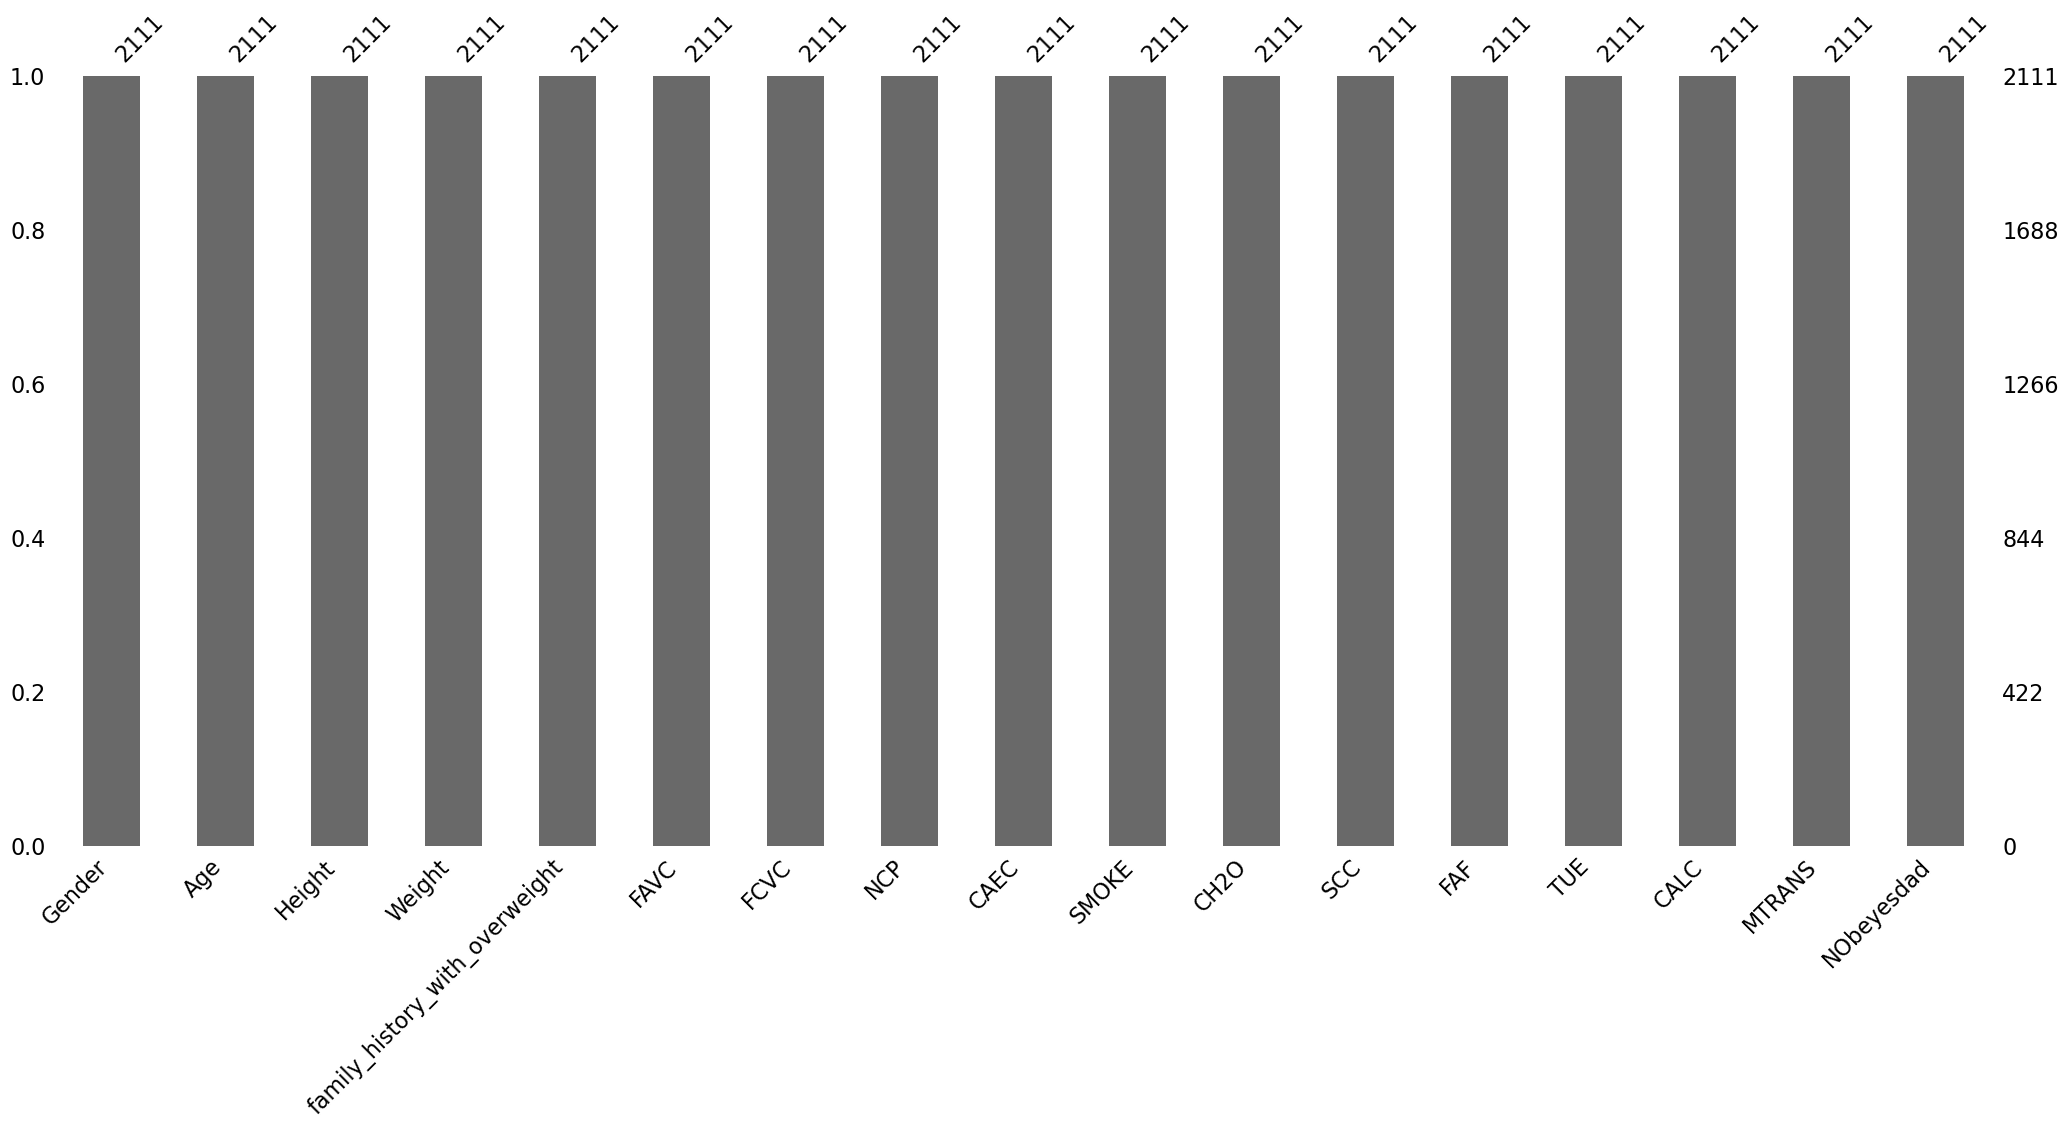

In [9]:
missingv = msno.bar(clu)

#### Outliers

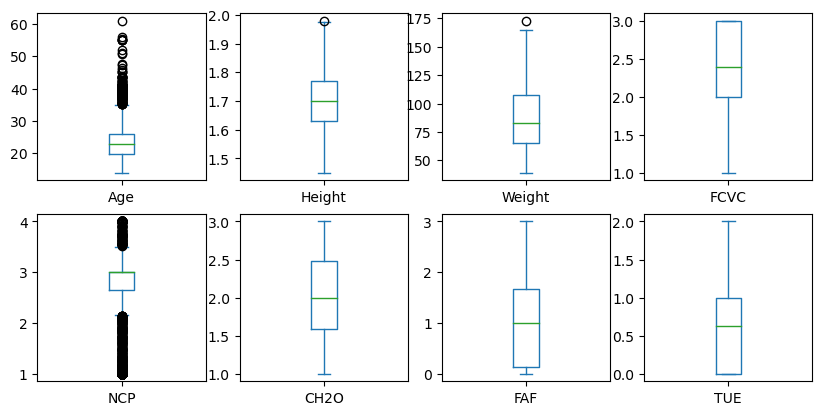

In [21]:
clu.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10));

In [24]:
sns.set_style('whitegrid')

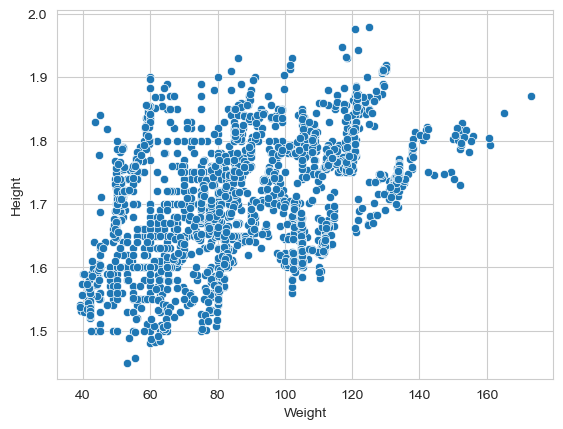

In [34]:
sns.scatterplot(data=clu, x='Weight', y='Height');

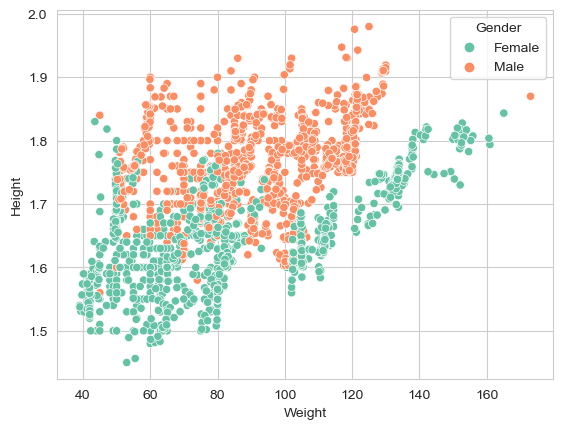

In [30]:
sns.scatterplot(data=clu, x='Weight', y='Height', hue='Gender', palette='Set2');

In [31]:
clu['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

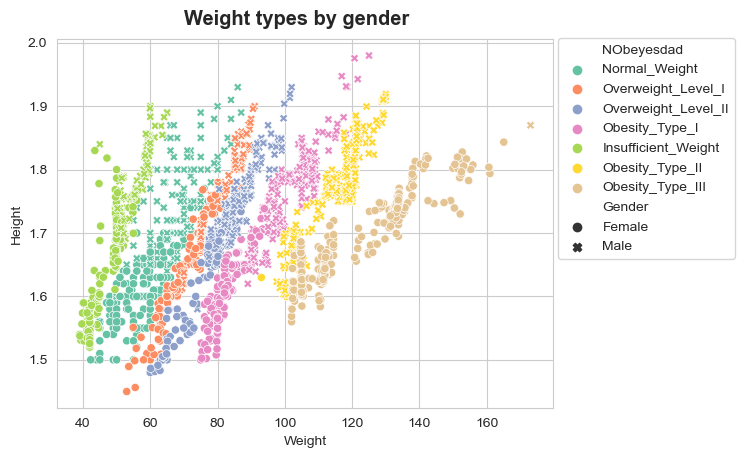

In [55]:
markers = {'Female': 'o', 'Male': 'X'}


ax = sns.scatterplot(data=clu, x='Weight', y='Height', hue='NObeyesdad', palette='Set2',style='Gender', markers=markers);
ax.figure.suptitle('Weight types by gender', y=.94, weight='bold', size='x-large');
plt.legend(loc='upper right', bbox_to_anchor=(1.38,1.02));

## Time Series

### Load our dataset and explore it by performing an Exploratory Data Analysis (EDA)

By performing an EDA we will understand our dataset, from its shape to its data.

#### Time Series Dataset

In [10]:
time_s = pd.read_csv('LMT.csv')

In [11]:
time_s.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,13.381902,14.877301,12.500000,14.455521,4.971642,23540786
1,1985-02-01,14.263804,16.411043,13.918712,15.529141,5.340889,29822480
2,1985-03-01,15.644172,16.334356,14.110429,14.838957,5.118644,22144528
3,1985-04-01,14.915644,15.184049,13.957055,14.455521,4.986383,15230068
4,1985-05-01,14.493865,16.372700,13.650307,15.835890,5.462530,22593430


In [12]:
time_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       473 non-null    object 
 1   Open       473 non-null    float64
 2   High       473 non-null    float64
 3   Low        473 non-null    float64
 4   Close      473 non-null    float64
 5   Adj Close  473 non-null    float64
 6   Volume     473 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 26.0+ KB


In [13]:
time_s.describe()

,Open,High,Low,Close,Adj Close,Volume
count,473.000000,473.000000,473.000000,473.000000,473.000000,4.730000e+02
mean,119.302216,125.388795,113.927337,120.181333,96.883033,3.274414e+07
std,133.628778,140.097818,128.027841,134.335934,128.991893,1.918104e+07
min,7.783742,8.205521,7.592025,7.860429,3.181921,1.247205e+06
25%,21.000000,22.200920,19.670244,21.088957,10.355659,2.030000e+07
50%,60.500000,61.970001,57.349998,60.599998,35.095600,2.899053e+07
75%,163.880005,171.360001,160.360001,166.970001,128.106201,4.314130e+07
max,486.519989,508.100006,473.670013,486.679993,470.197845,1.462322e+08


#### Null Values

Before searching for null values, we will replace infinite values to NaN values, this will help us see these values as NaN values in the following '.isnull()' operation, in case that we have them.

In [14]:
time_s.replace([np.inf, -np.inf], np.nan, inplace=True)

Percentage of null values in our dataset in each feature.

In [15]:
time_s.isnull().mean()*100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

Lets use the missingno library to visualise the above information of missing values.

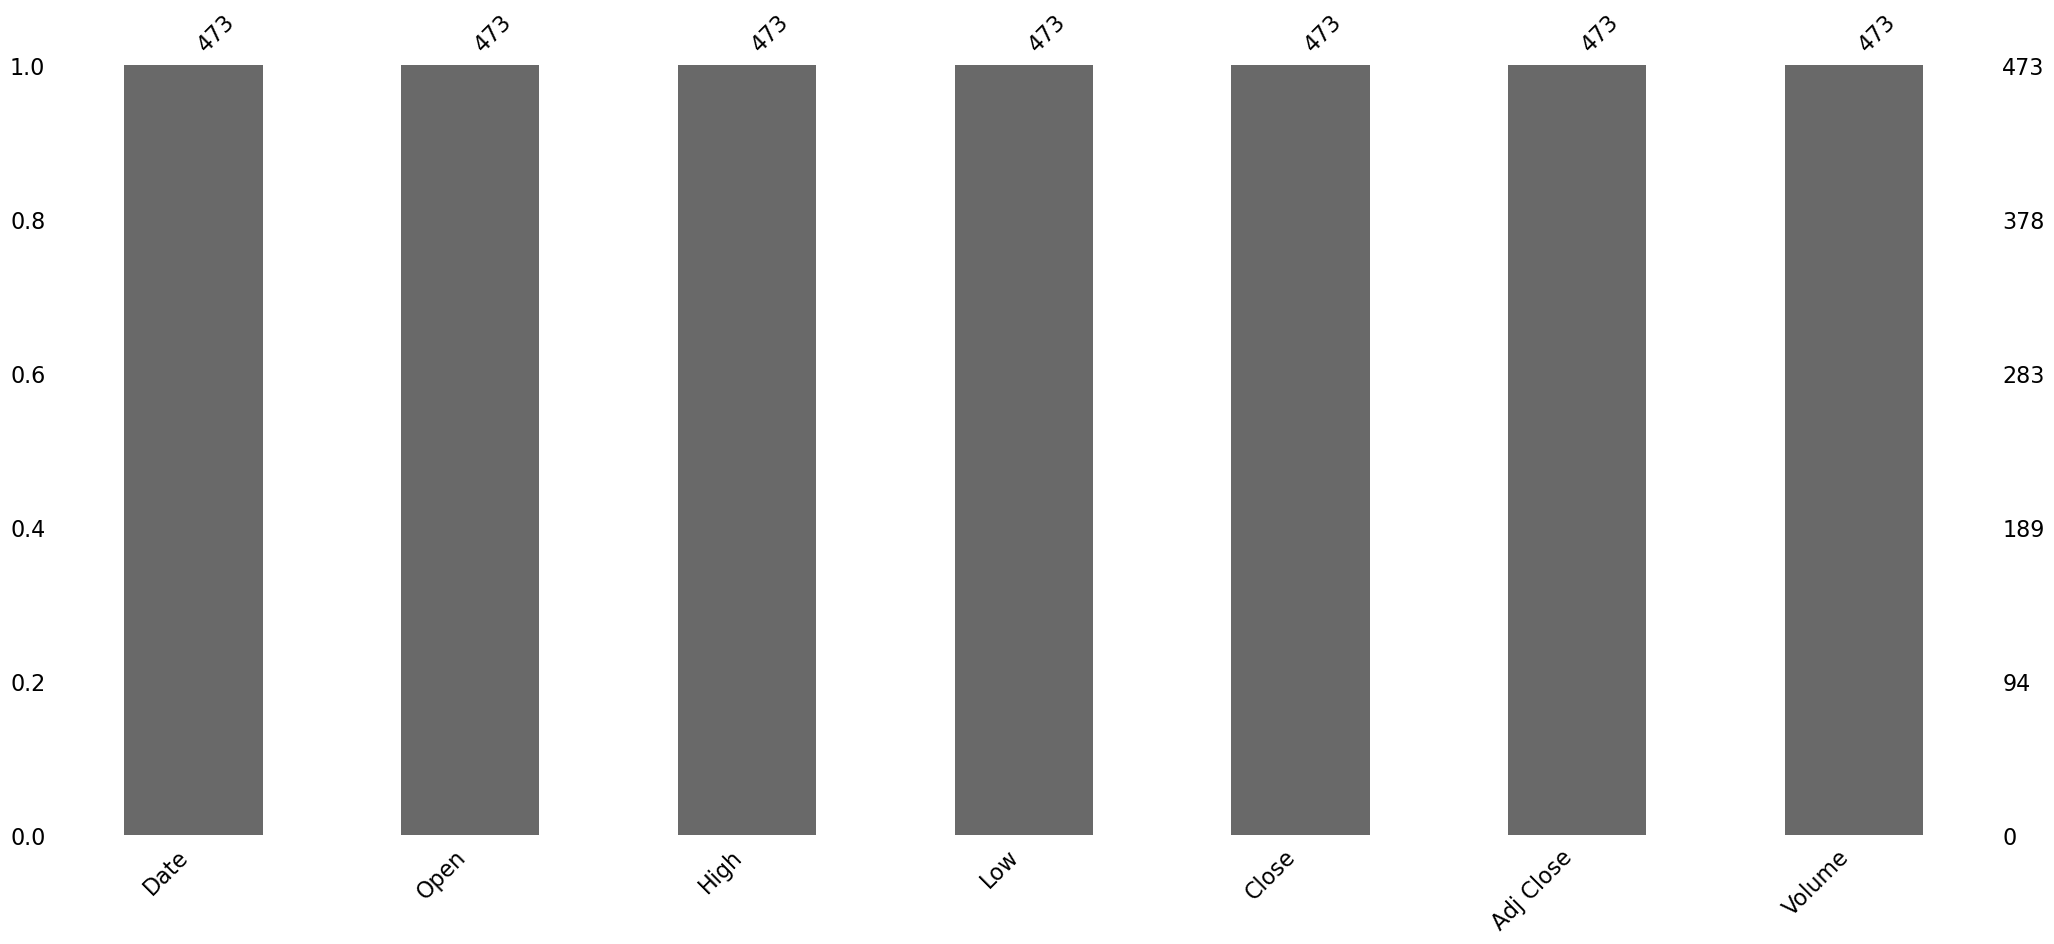

In [16]:
missingv2 = msno.bar(time_s)

## Github

## References